# DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut


This notebook demonstrates the necessary steps to use python and DeepLabCut for creating and analysins videos from orientation 
experiment 

This notebook illustrates how to:
 
- make a movie from images 
- create a project
- extract training frames
- label the frames
- plot the labeled images (optional)
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video (optional)
- Go to Matlab 



## Make  movie from images 

this step is to produce movie per trial. Each trial forlder contains around 600 images from each trial and the second row of each image.   

In [8]:
# enter the folder name 
Mainfolder = 'F:\\ar2breathing\\10_09_19';
#F:\ar2breathing\10_18_19
# entries for the xls file
Namesforarray =['Trialnumber','Licknumber','sidethatanimalshouldgo','timeinsecond','sensservomotor','movespots','correct','lickoccured','lihgontrials','allpulsesoflight','lightduration','Frequ','timestamp','RD'];

import os # this is to get folder information and creat files 
import cv2 # this is important and is reading and writing images and video 
import subprocess 
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import xlsxwriter  # this is to write xls files 
from PIL import Image
# define a functino to convert video_input into  video_output in mpeg format
def convert_video(video_input, video_output):
    cmds = ['ffmpeg', '-i', video_input, video_output]
    subprocess.Popen(cmds)


                                                                                                                        
Ratid = 50019;
this_date = 100819
col = 0
included_extensions = ['.png']
K_kir = Mainfolder;
All_Folders = os.listdir(Mainfolder)
print(All_Folders)
for num in range(0,len(All_Folders)):     #to iterate between 10 to 20

 KK = os.path.join(K_kir+os.sep, All_Folders[num])
 KKavi =  os.path.join(K_kir+os.sep, All_Folders[num]+'.avi')
 if os.path.isfile(KKavi):
   continue
 if not os.path.isdir(KK):
   continue
 dirContents = os.listdir(KK)
 if len(dirContents) == 0:
  shutil.rmtree(KK, ignore_errors=False, onerror=None)
  continue
 os.chdir(KK)
 my_file = os.path.join(K_kir,All_Folders[num]+'.xlsx');
 workbook = xlsxwriter.Workbook(my_file)
 worksheet = workbook.add_worksheet()
 files = filter(os.path.isfile, os.listdir(KK));
 files = [os.path.join(KK, f) for f in files] # add path to each file
 files.sort(key=lambda x: os.path.getmtime(x))
 nEWfiles = [os.path.splitext(os.path.basename(f)) for f in  files] # add path to each file
 nEWfiles = [int(f[0]) for f in nEWfiles]
 nEWfiles = sorted(nEWfiles)
 files = [os.path.join(KK, str(f)+'.png' )  for f in nEWfiles] # add path to each file
 video_name = (KK + '.avi');
 video_name2 =(KK+'video'+ '.mp4');
 print(video_name)
 frame = cv2.imread(os.path.join(Mainfolder, files[0]))
 height, width, layers = frame.shape
 video = cv2.VideoWriter(video_name, 0, 1, (width,height))
 fps = 100
 images = files
 worksheet.write_row(0, 0, Namesforarray)
 for idx,image in enumerate(images):
  #worksheet.write_row( idx+1,col, mat)
  frame = cv2.imread(os.path.join(Mainfolder, images[idx]))
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY);
  Mylist = np.array(gray[1,0:12]);
  mat1_single = np.reshape(Mylist, -1)
  mat = np.concatenate((mat1_single,[Ratid],[this_date]))
  worksheet.write_row( idx+1,col, mat)
  video.write(frame)
 workbook.close()
 cv2.destroyAllWindows()
 video.release()
 #os.chdir(Mainfolder)
 #shutil.rmtree(KK, ignore_errors=Fal``se, onerror=None)
 convert_video(video_name, video_name2)

['13-11-35', '23-38-41', '23-38-47', '23-38-59', '23-42-17', '23-43-13', '23-43-44', '23-44-15', '23-44-47', '23-45-18', '23-46-38', '23-51-40', '23-52-15', '23-53-25', '23-54-05', '23-54-29', '23-54-51', '23-55-13', '23-55-37', '23-56-00', '23-56-34', '23-57-05', '23-57-34', '23-58-12', '23-58-40', '23-59-08', '23-59-36']
F:\ar2breathing\10_09_19\23-42-17.avi
F:\ar2breathing\10_09_19\23-43-13.avi
F:\ar2breathing\10_09_19\23-43-44.avi
F:\ar2breathing\10_09_19\23-44-15.avi
F:\ar2breathing\10_09_19\23-44-47.avi
F:\ar2breathing\10_09_19\23-45-18.avi
F:\ar2breathing\10_09_19\23-46-38.avi
F:\ar2breathing\10_09_19\23-51-40.avi
F:\ar2breathing\10_09_19\23-52-15.avi
F:\ar2breathing\10_09_19\23-53-25.avi
F:\ar2breathing\10_09_19\23-54-05.avi
F:\ar2breathing\10_09_19\23-54-29.avi
F:\ar2breathing\10_09_19\23-54-51.avi
F:\ar2breathing\10_09_19\23-55-13.avi
F:\ar2breathing\10_09_19\23-55-37.avi
F:\ar2breathing\10_09_19\23-56-00.avi
F:\ar2breathing\10_09_19\23-56-34.avi
F:\ar2breathing\10_09_19\23-5

## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import deeplabcut


In [4]:
task='ar2breathing10_10_19' # Enter the name of your experiment Task
experimenter='Fassihi2' # Enter the name of the experimenter
video=['D:\\Notebook\\sc\\sc-Fassihi-2018-12-16\\videos\\video14-23-08.avi'] 
video=['D:\\rat movies SC\\ar17\\01_11_19\\video12-29-40.avi'] 
video=['D:\\rat_movies_SC\\ar17record\\02_27_19\\analyzed\\18-36-10video.MP4']
video=['D:\\movies_Rat_SC_project\\ar20\\07_08_19\\19-28-43video.mp4','D:\\movies_Rat_SC_project\\ar20\\07_08_19\\19-28-58video.mp4','D:\\movies_Rat_SC_project\\ar20\\07_08_19\\19-29-06video.mp4'] 
#Mainfolder = 'D:\\movies_Rat_SC_project\\ar14\\06_18_19'
video=['D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-24-26video.mp4','D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-24-02video.mp4','D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-26-36video.mp4'] 
video=['F:\\ar2breathing\\10_10_19\\00-00-00video.mp4','F:\\ar2breathing\\10_10_19\\00-00-22video.mp4','F:\\ar2breathing\\10_10_19\\00-00-46video.mp4'] 

Mainfolder = 'F:\\ar2breathing\\10_10_19';

#D:\rat movies SC\ar15\01_11_19
# Enter the paths of your videos you want to grab frames from.
# deeplabcut.create_new_project(task,experimenter,video, working_directory='Full path of the working directory',copy_videos=True/False) #change the working directory to where you want the folders created.
deeplabcut.create_new_project(task,experimenter,video, working_directory=Mainfolder,copy_videos=True) #change the working directory to where you want the folders created.

Created "F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\videos"
Created "F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\labeled-data"
Created "F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\training-datasets"
Created "F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\dlc-models"
Copying the videos
F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\videos\00-00-00video.mp4
F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\videos\00-00-22video.mp4
F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\videos\00-00-46video.mp4
Generated "F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\config.yaml"

A new project with name ar2breathing10_10_19-Fassihi2-2019-12-18 is created at F:\ar2breathing\10_10_19 and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configura

'F:\\ar2breathing\\10_10_19\\ar2breathing10_10_19-Fassihi2-2019-12-18\\config.yaml'

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\videos\00-00-00video.mp4 ?
yes/noyes
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 1200.0  seconds.
Do you want to extract (perhaps additional) frames for video: F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\videos\00-00-22video.mp4 ?
yes/noyes
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 1200.0  seconds.
Do you want to extract (perhaps additional) frames for video: F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\videos\00-00-46video.mp4 ?
yes/noyes
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 1200.0  seconds.

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


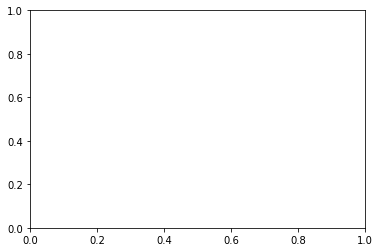

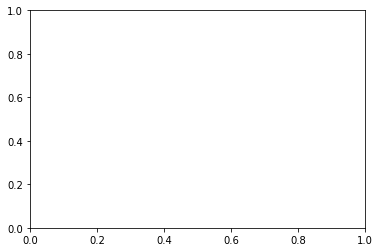

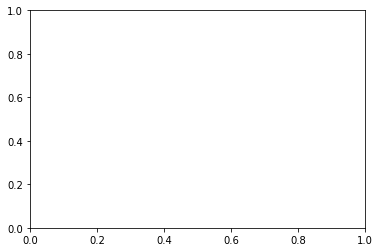

In [6]:
%matplotlib inline

path_config_file = 'F:\\ar2breathing\\10_10_19\\ar2breathing10_10_19-Fassihi2-2019-12-18\\config.yaml'
#Enter the path of the config file that was just created from the above step (check the folder)
deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=True) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 
#deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=True, checkcropping=True) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 
#You can change the cropping to false, then delete the checkcropping part!

In [2]:
path_config_file = 'D:\\movies_Rat_SC_project\\ar20\\06_20_19\\sc_ar20_06202019-Fassihi-2019-06-20\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
path_config_file = 'D:\\movies_Rat_SC_project\\ar20\\07_08_19\\sc_ar20_07082019-Fassihi3-2019-07-09\\config.yaml'
path_config_file = 'D:\\movies_Rat_SC_project\\ar14\\09_17_19\\ar14_09172019_ii-Fassihi-2019-09-17\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
path_config_file = 'D:\\rat_movies_SC\\ar19muscimol\\10_10_2019\\ar19_10102019-Fassihi-2019-11-12\\config.yaml'
path_config_file = 'D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\ar19_10082019-Fassihi-2019-11-25\\config.yaml'
path_config_file = 'D:\\rat_movies_SC\\ar19tear19salin\\10_08_19_waterspouts\\ar19_10082019_waterspouts-Fassihi-2019-11-28\\config.yaml'
path_config_file = 'F:\\ar2breathing\\10_10_19\\ar2breathing10_10_19-Fassihi2-2019-12-18\\config.yaml'


## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [7]:
%gui wx
#path_config_file = 'D:\\rat movies SC\\ar15record\\02_27_19\\sc_ar15record_02272019-Fassihi-2019-03-12\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'

deeplabcut.label_frames(path_config_file)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [3]:
#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'
#path_config_file = 'D:\\movies_Rat_SC_project\\ar2breathing\\10_04_19\\ar14_09172019_ii-Fassihi-2019-10-05\\config.yaml'
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by Fassihi2.
They are stored in the following folder: F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\labeled-data\00-00-00video_labeled.
They are stored in the following folder: F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\labeled-data\00-00-22video_labeled.
They are stored in the following folder: F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\labeled-data\00-00-46video_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [4]:
#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'
#path_config_file = 'D:\\movies_Rat_SC_project\\ar2breathing\\10_04_19\\ar14_09172019_ii-Fassihi-2019-10-05\\config.yaml'
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Start training - If you want to use a CPU, continue. 
### If yu want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [3]:

#path_config_file = 'D:\\rat movies SC\\ar19\\02_07_19\\sc_ar19_02072019-Fassihi4-2019-02-13\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\rat movies SC\\ar15record\\02_27_19\\sc_ar15record_02272019-Fassihi-2019-03-12\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_confic_file = 'D:\rat_movies_SC\ar17record\02_27_19\sc_ar17record_02272019-Fassihi-2019-03-05\config.yaml'
#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'
#path_config_file = 'D:\\rat_movies_SC\\ar15record\\02_27_19\\sc_ar15record_02272019_4-Fassihi-2019-05-02\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)

deeplabcut.train_network(path_config_file,shuffle=1,displayiters=1000,saveiters=1000)

Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['Nose', 'Snout', 'Head'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ar2breathing10_10_19Dec18\\ar2breathing10_10_19_Fassihi295shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Arash\\Anaconda3\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ar2breathing10_10_19Dec18\\Documentation_data-ar2breathing1

INFO:tensorflow:Restoring parameters from C:\Users\Arash\Anaconda3\envs\dlc-windowsGPU\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt
Display_iters overwritten as 1000
Save_iters overwritten as 1000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'F:\\ar2breathing\\10_10_19\\ar2breathing10_10_19-Fassihi2-2019-12-18\\dlc-models\\iteration-0\\ar2breathing10_10_19Dec18-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default'

iteration: 1000 loss: 0.0248 lr: 0.005
iteration: 2000 loss: 0.0125 lr: 0.005
iteration: 3000 loss: 0.0101 lr: 0.005
iteration: 4000 loss: 0.0081 lr: 0.005
iteration: 5000 loss: 0.0075 lr: 0.005
iteration: 6000 loss: 0.0067 lr: 0.005
iteration: 7000 loss: 0.0063 lr: 0.005
iteration: 8000 loss: 0.0058 lr: 0.005
iteration: 9000 loss: 0.0059 lr: 0.005
iteration: 10000 loss: 0.0052 lr: 0.005
iteration: 11000 loss: 0.0088 lr: 0.02
iteration: 12000 loss: 0.0072 lr: 0.02
iteration: 13000 loss: 0.0063 lr: 0.02
iteration: 14000 loss: 0.0059 lr: 0.02
iteration: 15000 loss: 0.0054 lr: 0.02
iteration: 16000 loss: 0.0051 lr: 0.02
iteration: 17000 loss: 0.0050 lr: 0.02
iteration: 18000 loss: 0.0047 lr: 0.02
iteration: 19000 loss: 0.0046 lr: 0.02
iteration: 20000 loss: 0.0044 lr: 0.02
iteration: 21000 loss: 0.0041 lr: 0.02
iteration: 22000 loss: 0.0042 lr: 0.02
iteration: 23000 loss: 0.0039 lr: 0.02
iteration: 24000 loss: 0.0037 lr: 0.02
iteration: 25000 loss: 0.0037 lr: 0.02
iteration: 26000 loss: 0

KeyboardInterrupt: 

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [4]:
#deeplabcut.evaluate_network(path_config_file)
#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'
deeplabcut.evaluate_network(path_config_file,Shuffles=[1], plotting=False)

Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['Nose', 'Snout', 'Head'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ar2breathing10_10_19Dec18\\ar2breathing10_10_19_Fassihi295shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Arash\\Anaconda3\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ar2breathing10_10_19Dec18\\Documentation_data-ar2breathing1

Running  DeepCut_resnet50_ar2breathing10_10_19Dec18shuffle1_83000  with # of trainingiterations: 83000
INFO:tensorflow:Restoring parameters from F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\dlc-models\iteration-0\ar2breathing10_10_19Dec18-trainset95shuffle1\train\snapshot-83000
Analyzing data...


75it [00:07,  9.39it/s]


Done and results stored for snapshot:  snapshot-83000
Results for 83000  training iterations: 95 1 train error: 2.05 pixels. Test error: 2.9  pixels.
With pcutoff of 0.1  train error: 2.05 pixels. Test error: 2.9 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [ ]:
#path_config_file = 'D:\\Notebook\\sc\\sc-Fassihi-2018-12-15\\config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)
whismovie = 4;
#videofile_path = ['D:\\Notebook\\sc\\sc-Fassihi-2018-12-16\\videos\\video14-23-50.avi'] #Enter the list of videos to analyze.
#path_config_file = 'D:\\rat movies SC\\ar19\\02_07_19\\sc_ar19_02072019-Fassihi4-2019-02-13\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file ='D:\\rat movies SC\\ar17record\\02_27_19\\sc_ar17record_02272019-Fassihi-2019-03-05\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'
#path_config_file = 'D:\\movies_Rat_SC_project\\ar1\\05_24_19\\sc_aa1_05242019-Fassihi-2019-05-30\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar3\\06_07_19\\sc_aa3_06072019-Fassihi-2019-06-10\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)

import os
Mainfolder = 'F:\\ar2breathing\\10_18_19'

Mainfolder = 'D:\\rat_movies_SC\\ar17\\02_25_19'
Mainfolder = 'D:\\rat_movies_SC\\ar19tear19salin\\10_08_19'
Mainfolder = 'D:\\rat_movies_SC\\ar19muscimol\\10_10_2019'
Mainfolder = 'F:\\ar2breathing\\10_08_19'

#text_files = [f for f in os.listdir(Mainfolder) if f.endswith('.avi') and not f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]
text_files = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('.mp4') and not f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]
video = ['D:\\movies_Rat_SC_project\\ar20\\06_19_19\\18-16-44.avi']
#video = ['D:\\movies_Rat_SC_project\\ar20\\06_20_19\\15-51-42.avi','D:\\movies_Rat_SC_project\\ar20\\06_19_19\\18-16-44.avi']
video = ['D:\\movies_Rat_SC_project\\ar20\\06_20_19\\15-51-42.avi','D:\\movies_Rat_SC_project\\ar20\\06_19_19\\18-16-44.avi']

#print(video)
video = ['F:\\ar2breathing\\10_18_19\\00-16-30video.mp4']
print(text_files[3])
print(len(text_files))
print(path_config_file)

#deeplabcut.analyze_videos(path_config_file,text_files[1:len(text_files)],shuffle=1, save_as_csv=True)
#deeplabcut.analyze_videos(path_config_file,text_files[3],shuffle=1, save_as_csv=True)
deeplabcut.analyze_videos(path_config_file,text_files,shuffle=1, save_as_csv=True)

F:\ar2breathing\10_08_19\18-59-47video.mp4
187
F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\config.yaml
Using snapshot-83000 for model F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\dlc-models\iteration-0\ar2breathing10_10_19Dec18-trainset95shuffle1
INFO:tensorflow:Restoring parameters from F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\dlc-models\iteration-0\ar2breathing10_10_19Dec18-trainset95shuffle1\train\snapshot-83000


INFO:tensorflow:Restoring parameters from F:\ar2breathing\10_10_19\ar2breathing10_10_19-Fassihi2-2019-12-18\dlc-models\iteration-0\ar2breathing10_10_19Dec18-trainset95shuffle1\train\snapshot-83000


Starting to analyze %  F:\ar2breathing\10_08_19\18-56-02video.mp4
Loading  F:\ar2breathing\10_08_19\18-56-02video.mp4
Duration of video [s]:  1200.0 , recorded with  1.0 fps!
Overall # of frames:  1200  found with (before cropping) frame dimensions:  1024 390
Starting to extract posture


  0%|                                                                                         | 0/1200 [00:00<?, ?it/s]

In [38]:
print(text_files[2:10])

['D:\\movies_Rat_SC_project\\ar14\\06_18_19\\15-16-14.avi', 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\15-16-20.avi', 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\15-17-08.avi', 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\15-17-15.avi', 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\15-17-33.avi', 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\15-17-50.avi', 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\15-18-01.avi', 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\15-18-08.avi']


In [ ]:
path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'
video=['D:\\rat_movies_SC\\ar17\\02_25_19\\22-38-53.avi']
deeplabcut.analyze_videos(path_config_file,video,shuffle=1, save_as_csv=True)

In [ ]:
import numpy


In [ ]:
import os
Mainfolder = 'D:\\rat_movies_SC\\ar17\\02_25_19'
f2 = os.listdir(Mainfolder)
text_files = [Mainfolder+'\\'+f for f in os.listdir(Mainfolder) if f.endswith('.avi') and not f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]
print(text_files)
      

## Extract outlier frames [This is important step actually]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [6]:
#video=['D:\\rat_movies_SC\\ar17record\\02_27_19\\analyzed\\18-37-27.avi']
#video=['D:\\rat_movies_SC\\ar15record\\02_27_19\\17-33-50video.mp4']
#video=['D:\\Dropbox\\ar17\\02_25_19\\22-37-23.avi']
video = ['D:\\movies_Rat_SC_project\\ar1\\05_24_19\\11-09-14.avi']
video = ['D:\\movies_Rat_SC_project\\ar20\\06_20_19\\17-19-45.avi','D:\\movies_Rat_SC_project\\ar20\\06_20_19\\17-31-05.avi','D:\\movies_Rat_SC_project\\ar20\\06_20_19\\17-30-40.avi']
#15-17-08v
video = ['D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-27-18.avi','D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-24-47.avi']
video = ['D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-24-26video.mp4']
video = ['F:\\ar2breathing\\10_18_19\\00-13-17video.mp4']

#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'
#path_config_file = 'D:\\rat_movies_SC\\ar15record\\02_27_19\\sc_ar15record_02272019-Fassihi-2019-03-12\\config.yaml'
#path_config_file = 'D:\\movies_Rat_SC_project\\ar1\\05_24_19\\sc_aa1_05242019-Fassihi-2019-05-30\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar3\\06_07_19\\sc_aa3_06072019-Fassihi-2019-06-10\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\sc_ar14_06182019-Fassihi-2019-06-19\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
print(path_config_file)

#deeplabcut.extract_outlier_frames(path_config_file,video,outlieralgorithm='uncertain',p_bound=.6)
deeplabcut.extract_outlier_frames(path_config_file,video,outlieralgorithm='uncertain',comparisonbodyparts =  ['nose','snout'],p_bound=.6)

F:\ar2breathing\10_18_19\ar2breathing10_18_19-Fassihi-2019-12-16\config.yaml
network parameters: DeepCut_resnet50_ar2breathing10_18_19Dec16shuffle1_68000
Method  uncertain  found  54  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noyes
Frames from video 00-13-17video  already extracted (more will be added)!
Loading video...
Duration of video [s]:  1400.0 , recorded @  1.0 fps!
Overall # of frames:  1400 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 1400.0  seconds.
Extracting and downsampling... 53  frames from the video.


53it [00:06,  5.31it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [21, 1134, 1075, 30, 1122, 160, 49, 152, 1129, 1142, 1131, 161, 1132, 1137, 24, 151, 18, 157, 1124]
Creating the symbolic link of the video
AUTOMATIC ADDING OF VIDEO TO CONFIG FILE FAILED! You need to do this manually for including it in the config.yaml file!
Videopath: F:\ar2breathing\10_18_19\00-13-17video.mp4 Coordinates for cropping: None
The outlier frames are extracted. They are stored in the subdirectory labeled-data\00-13-17video.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


In [12]:
print(video[2])


D:\movies_Rat_SC_project\ar20\06_20_19\17-30-40avi


In [4]:

path_config_file = 'D:\\rat_movies_SC\\ar19\\02_07_19\\sc_ar19_02072019-Fassihi4-2019-02-13\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)

import os
Mainfolder = 'D:\\rat_movies_SC\\ar19\\02_07_19'


f = os.listdir(Mainfolder)
text_files = [f for f in os.listdir(Mainfolder) if f.endswith('.avi')]


my_list = text_files
thisApen = Mainfolder+'kir'
thisApen = thisApen.replace("kir", "\\")
string = thisApen
my_new_list = [ string + x for x in my_list]

deeplabcut.extract_outlier_frames(path_config_file,my_new_list)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\rat_movies_SC\\ar19\\02_07_19'

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [7]:
#path_config_file = 'D:\\movies_Rat_SC_project\\ar1\\05_24_19\\sc_aa1_05242019-Fassihi-2019-05-30\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar3\\06_07_19\\sc_aa3_06072019-Fassihi-2019-06-10\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)

#import matplotlib
#print(matplotlib.__version__)
%gui wx
#path_config_file = 'D:\\rat_movies_SC\\ar15record\\02_27_19\\sc_ar15record_02272019-Fassihi-2019-03-12\\config.yaml'
#print(path_config_file)
deeplabcut.refine_labels(path_config_file)

ERROR:root:Cannot activate multiple GUI eventloops


Windows
Checking labels if they are outside the image
A training dataset file is already found for this video. The refined machine labels are merged to this data!
Windows
Checking labels if they are outside the image
A training dataset file is already found for this video. The refined machine labels are merged to this data!
Closing... The refined labels are stored in a subdirectory under labeled-data. Use the function 'merge_datasets' to augment the training dataset, and then re-train a network using create_training_dataset followed by train_network!


In [8]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
#path_config_file = 'D:\\movies_Rat_SC_project\\ar1\\05_24_19\\sc_aa1_05242019-Fassihi-2019-05-30\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar3\\06_07_19\\sc_aa3_06072019-Fassihi-2019-06-10\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)

deeplabcut.merge_datasets(path_config_file)

Merged data sets and updated refinement iteration to 3.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [30]:
list_of_ints = list(range(2))
print(list_of_ints)
deeplabcut.create_training_dataset(path_config_file,Shuffles= list_of_ints) ;

[0, 1]
F:\ar2breathing\10_18_19\ar2breathing10_18_19-Fassihi-2019-12-16\training-datasets\iteration-3\UnaugmentedDataSet_ar2breathing10_18_19Dec16  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

F:\ar2breathing\10_18_19\ar2breathing10_18_19-Fassihi-2019-12-16\config.yaml
Starting %  F:\ar2breathing\10_18_19 ['F:\\ar2breathing\\10_18_19\\00-16-30video.mp4']
Loading  F:\ar2breathing\10_18_19\00-16-30video.mp4 and data.
False 0 1024 0 390
1200
Duration of video [s]:  1200.0 , recorded with  1.0 fps!
Overall # of frames:  1200 with cropped frame dimensions:  1024 390
Generating frames and creating video.


 49%|██████████████████████████████████████▊                                        | 589/1200 [01:47<02:32,  4.00it/s]

KeyboardInterrupt: 

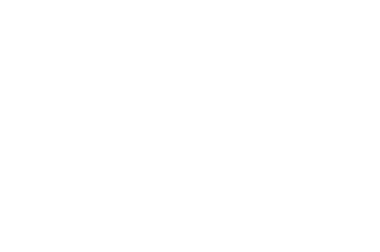

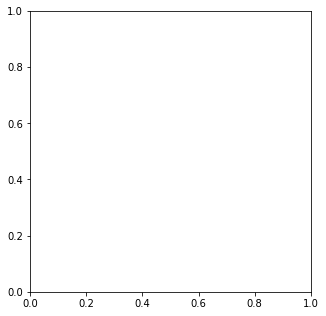

In [13]:
print(path_config_file)
videofile  = ['D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-24-02.avi','D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-24-47.avi']
videofile = ['F:\\ar2breathing\\10_18_19\\00-16-30video.mp4']

deeplabcut.create_labeled_video(path_config_file,videofile,save_frames=True) # my_new_list was created in prevouse cell as all videos in the folder 
#deeplabcut.create_labeled_video(path_config_file,text_files,save_frames=True) # my_new_list was created in prevouse cell as all videos in the folder 

## Plot the trajectories of the analyzed videos (optional)
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
%matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,my_new_list)

